# Get Histogram

Import all modules:

In [46]:
import drp_template.input_output as io
from drp_template.image import plot_histogram as plt_hist
from drp_template.image import save_figure2
from drp_template.default_params import update_parameters_file, read_parameters_file
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm

Set parameters for import uint16.raw:

In [57]:
# file_path = '../examples/data/raw_100cube.raw'
# file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_segmented.raw'
file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw'
raw_file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube.raw'
# raw_file_path = 'data/raw_100cube.raw'
dimensions = {'nz': 400, 'ny': 400, 'nx': 400}
data = io.import_model(file_path=file_path, dtype='uint8', dimensions=dimensions)
data_raw = io.import_model(file_path=raw_file_path, dtype='uint16', dimensions=dimensions)

Parameters filename: 400Cube_all_phases_threshold.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400
------------------------------------------------------------------------------------------------------------------------------------------------------
/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw: 
Ups, the minimum value in your data is 1. Automatic adjustments are needed.                                                                           
------------------------------------------------------------------------------------------------------------------------------------------------------
Parameters filename: 400Cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400


In [58]:
# Define the json file name
params_file_raw = '400Cube.json'
params_file_segmented = '400Cube_segmented.json'

Plot histogram for uint16.raw and save it accordingly:

Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/figure_400cube_histogram_raw.png


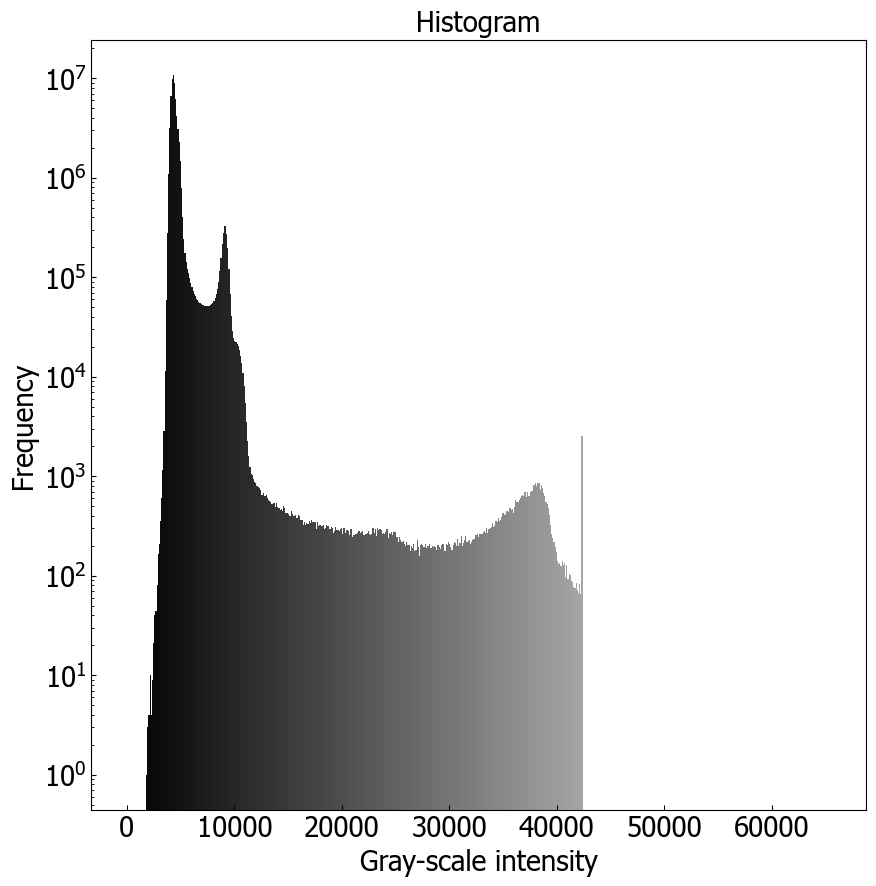

In [4]:
fig, ax = plt_hist(data=data_raw, paramsfile=params_file_raw, title=None, log_scale='y', dark_mode=False, cmap_set='gray')
save_figure2(fig, filename='figure_400cube_histogram_raw')

In [59]:
# Plot new histogram indicating the set thresholds of the gray-scale intensities. 
# Each threshold, e.g., 0 to 10000, or 10001 to 40000 will be represented by a different color.
# The histogram will be saved as a PNG file.

# Get the labels from the segemented data (parameters-file)
labels = read_parameters_file(paramsfile=params_file_segmented, paramsvars='labels')
print(labels)

{'0': 'Pore', '1': 'Qtz', '2': 'Fsp', '3': 'Bt', '4': 'hDensity'}


In [60]:
# Define the threshold ranges and assign corresponding labels
thresholds = {
    f"{labels['0']}": [0, 4000],
    f"{labels['1']}": [4001, 4550],
    f"{labels['2']}": [4551, 5500],
    f"{labels['3']}": [5501, 11000],
    f"{labels['4']}": [11001, 65535]
    # f"{labels['5']}": [4001, 4550],
}
# Save the thresholds to a JSON file
update_parameters_file(paramsfile=params_file_raw, thresholds=thresholds)

In [61]:
# Get the thresholds
thresholds = read_parameters_file(paramsfile=params_file_raw, paramsvars='thresholds')
# print the thresholds
print(thresholds)

{'Pore': [0, 4000], 'Qtz': [4001, 4550], 'Fsp': [4551, 5500], 'Bt': [5501, 11000], 'hDensity': [11001, 65535]}


In [62]:
import os
import numpy as np
import drp_template.bin.default_parameters as params

# S E T T I N G S
json_file_path = '/Users/martin/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/drp_template/default_params/default_figure_settings.json'
default_figure_settings = read_parameters_file(paramsfile=json_file_path, paramsvars=None)

im_left = default_figure_settings.get('im_left')
im_left_xz = default_figure_settings.get('im_left_xz')
im_right = default_figure_settings.get('im_right')
im_bottom = default_figure_settings.get('im_bottom')
im_width = default_figure_settings.get('im_width')
im_height = default_figure_settings.get('im_height')
cax_width = default_figure_settings.get('cax_width')
fig_width = default_figure_settings.get('fig_width')
fig_height = default_figure_settings.get('fig_height')
cax_space_left = default_figure_settings.get('cax_space_left')
cax_space_right = default_figure_settings.get('cax_space_right')
im_title = default_figure_settings.get('im_title')
plt.rcParams['font.size'] = default_figure_settings.get('font_size')
plt.rcParams['font.family'] = default_figure_settings.get('font_family')

In [63]:
def plot_threshold_histogram(
    data,
    thresholds=None,
    threshold_labels=None,
    threshold_colors=None,
    paramsfile='parameters.json',
    dtype=None,
    cmap_set=None,
    title=None,
    log_scale='both',
    dark_mode=True,
    num_bins=None
):
    """
    Plot a histogram with columns colored according to threshold ranges.

    Parameters:
    -----------
    data : numpy array
        1D array containing gray-scale intensities.
    thresholds : list of tuples, optional (default=None)
        List of (min, max) tuples defining the threshold ranges to color differently.
        Example: [(0, 50), (50, 150), (150, 255)] for three threshold ranges.
    threshold_labels : list of str, optional (default=None)
        Labels for each threshold range, used in the legend.
        Example: ['Air', 'Phase 1', 'Phase 2']
    threshold_colors : list of str, optional (default=None)
        Custom colors for each threshold range. Must be valid matplotlib colors.
    paramsfile : str, optional (default='parameters.json')
        Name of the JSON file containing plotting parameters.
    dtype : str, optional (default=None)
        Data type of the input array. If not provided, it is read from the parameters file.
    cmap_set : Matplotlib colormap or str, optional (default=None)
        The colormap to be used for the plot if thresholds are not provided.
    title : str, optional (default=None)
        The title of the plot.
    log_scale : {'both', 'x', 'y'}, optional (default='both')
        Specifies whether to apply log scale to both axes ('both'), only the x-axis ('x'), 
        or only the y-axis ('y').
    dark_mode : bool, optional (default=True)
        If True, set a dark background; otherwise, set a light background.
    num_bins : int, optional (default=None)
        Number of bins to use for the histogram. If provided, overrides automatic bin calculation.

    Returns:
    --------
    fig : Matplotlib Figure
        The Matplotlib figure object.
    ax : Matplotlib Axes
        The Matplotlib axes object.
    """
    # Flatten data if it's multidimensional
    data = data.flatten()
    
    # Set dtype based on the parameters file if not provided
    if dtype is None:
        dtype = read_parameters_file(paramsfile=paramsfile, paramsvars='dtype')

    # Determine gray_max based on dtype
    gray_max = 255 if dtype == 'uint8' else 65535

    # Set default colormap if not specified
    if cmap_set is None:
        cmap_set = default_figure_settings.get('colormap')
        cmap_set = eval(cmap_set)

    # Set color scheme based on dark_mode
    if dark_mode:
        text_color, face_color, edge_color = 'white', 'black', 'white' 
    else:
        text_color, face_color, edge_color = 'black', 'white', 'black'

    # Calculate histogram bins
    if num_bins is not None:
        bins = np.linspace(0, gray_max, num_bins + 1)
    else:
        # Calculate histogram bins using Freedman-Diaconis rule (same as template)
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bins_width = 2 * iqr / (len(data) ** (1 / 3))
        bins = np.arange(0, gray_max + bins_width, bins_width)

    # Compute histogram of gray-scale intensities
    hist, bins = np.histogram(data, bins=bins, range=(0, gray_max))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = bins[1:] - bins[:-1]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), facecolor=face_color, edgecolor=edge_color)
    
    # Convert dictionary thresholds to list of tuples if needed
    if isinstance(thresholds, dict):
        threshold_labels = list(thresholds.keys())
        thresholds = [thresholds[key] for key in threshold_labels]
    
    # Default colors if no thresholds are provided - use standard histogram
    if thresholds is None:
        # Create a color map for the histogram bars (same as template)
        cmap = plt.cm.get_cmap(cmap_set)
        colors = cmap(np.linspace(0, 1, len(bins) - 1))
        ax.bar(bins[:-1], hist, width=bin_widths, color=colors, linewidth=0.5, edgecolor=None)
    else:
        # Generate default colors if not provided
        if threshold_colors is None:
            if cmap_set is not None:
                cmap = plt.cm.get_cmap(cmap_set)
                threshold_colors = [cmap(i) for i in np.linspace(0, 1, len(thresholds))]
            else:
                threshold_colors = [f'C{i%10}' for i in range(len(thresholds))]
        
        # Set threshold labels if not provided
        if threshold_labels is None:
            threshold_labels = [f'Threshold {i+1}' for i in range(len(thresholds))]
        
        # Set default color for bins not in any threshold
        default_color = 'gray' if dark_mode else 'lightgray'

        # Use a Python list for bar_colors
        bar_colors = [default_color] * len(bin_centers)

        # Color the bars according to thresholds
        for i, (min_val, max_val) in enumerate(thresholds):
            in_range = (bin_centers >= min_val) & (bin_centers <= max_val)
            for idx, flag in enumerate(in_range):
                if flag:
                    bar_colors[idx] = threshold_colors[i % len(threshold_colors)]

        # Plot bars with individual colors
        for center, height, width, color in zip(bin_centers, hist, bin_widths, bar_colors):
            ax.bar(center, height, width=width, color=color, edgecolor=None)
        
        # Add legend
        legend_elements = []
        for i, label in enumerate(threshold_labels):
            color = threshold_colors[i % len(threshold_colors)]
            legend_elements.append(plt.Rectangle((0, 0), 1, 1, color=color, label=label))
        
        ax.legend(handles=legend_elements, loc='upper right', 
                 facecolor=face_color, edgecolor=edge_color, framealpha=0.7)

    # Apply log scale based on the log_scale parameter (same as template)
    if log_scale == 'both':
        ax.set_xscale('log')
        ax.set_yscale('log')
    elif log_scale == 'x':
        ax.set_xscale('log')
    elif log_scale == 'y':
        ax.set_yscale('log')
        ax.set_ylim(bottom=0.1)

    # Set labels and title with adjusted font size (same as template)
    font_size = plt.rcParams['font.size']
    ax.set_xlabel('Gray-scale intensity', color=text_color, fontsize=font_size)
    ax.set_ylabel('Frequency', color=text_color, fontsize=font_size)

    # Set title with adjusted font size (same as template)
    title_text = 'Threshold Histogram' if title is None else title
    ax.set_title(title_text, color=text_color, fontsize=font_size)

    # Set tick parameters with adjusted font size (same as template)
    ax.tick_params(axis='both', which='both', direction='in', labelsize=font_size, colors=text_color)

    # Set spines edge color for the entire subplot (same as template)
    for spine in ax.spines.values():
        spine.set_edgecolor(edge_color)

    # Set background color (same as template)
    ax.set_facecolor(face_color)

    return fig, ax

In [64]:
# Define your threshold ranges
# Read thresholds and labels from the paramsfile
thresholds_dict = read_parameters_file(paramsfile=params_file_raw, paramsvars='thresholds')

# Convert the thresholds dictionary into a list of tuples and labels
thresholds = [(v[0], v[1]) for v in thresholds_dict.values()]
threshold_labels = list(thresholds_dict.keys())

print(f"Thresholds: {thresholds}")
print(f"Threshold labels: {threshold_labels}")

Thresholds: [(0, 4000), (4001, 4550), (4551, 5500), (5501, 11000), (11001, 65535)]
Threshold labels: ['Pore', 'Qtz', 'Fsp', 'Bt', 'hDensity']


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Threshold Histogram'}, xlabel='Gray-scale intensity', ylabel='Frequency'>)

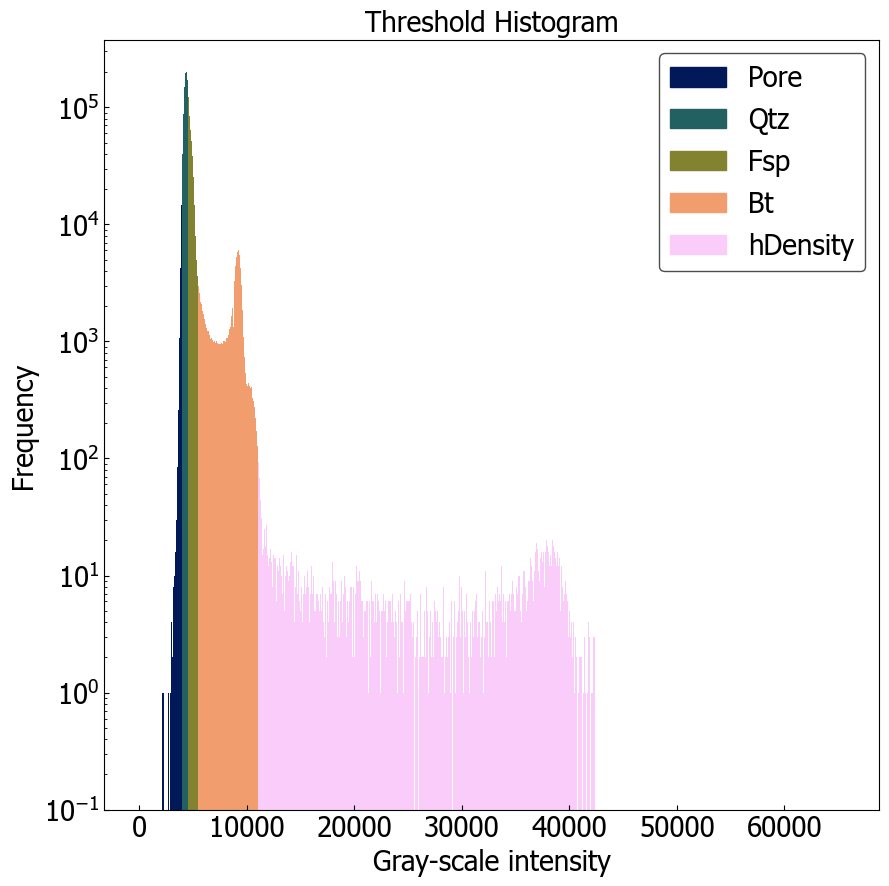

In [65]:
from matplotlib import colors
from cmcrameri import cm

# Example: 3 thresholds
threshold_colors = [colors.to_hex(cm.batlow(i)) for i in np.linspace(0, 1, len(thresholds))]

# Plot the histogram with custom colors
# fig, ax = plot_threshold_histogram(
#     data_raw, 
#     thresholds=thresholds,
#     threshold_labels=threshold_labels,
#     paramsfile=params_file_raw,
#     threshold_colors=None,  # Use custom colors
#     log_scale='both',
#     title='Material Phase Distribution with Custom Colors',
#     dark_mode=False
# )

plot_threshold_histogram(data=data_raw, thresholds=thresholds, threshold_labels=threshold_labels, threshold_colors=threshold_colors,
                           paramsfile=params_file_raw, dtype=None, cmap_set=None, title=None, 
                           log_scale='y', dark_mode=False, num_bins=None)